# Music Recommendation System

Name: Rutuja Yogesh Mahajan


Level: Beginner


Task: 03


College: MIT Academy of Engineering, Pune

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [3]:
ntr = 7000
nts = 3000
data_path = r"C:/Users/rutuj/Downloads/train/train.csv"
train = pd.read_csv(data_path,nrows=ntr)
names=['msno','song_id','source_system_tab','source_screen_name','source_type','target']
test1 = pd.read_csv(data_path,names=names,skiprows=ntr,nrows=nts)
songs = pd.read_csv(r"C:/Users/rutuj/Downloads/songs/songs.csv")
members = pd.read_csv(r"C:/Users/rutuj/Downloads/members/members.csv")

# Exploratory Data Analysis

In [6]:
# train dataset
train.sample(10)

,msno,song_id,source_system_tab,source_screen_name,source_type,target
3500,g5qW6lgWMRGCrLpV8YhdQYho4t0fC0bC3p3uupIs80U=,6OftgRZSctRRuTzc8y52dmPjtZ81uWzowrB6h6eV2ME=,my library,Local playlist more,local-library,0
308,rr4UgAoJj0ry3aAo7SJy6RZy8psI9aPwgIQiA1cu39Q=,VFWmrWVR8IbIiP4iwS+RwATCVRqZozRMJ06PqQQeEBI=,my library,Local playlist more,local-library,1
4249,hPn6PsLoyOC5xiXzK2PlsRL02GkVAc73d0F54KoBs0A=,u6/Pb7X4u7KU4gXrBgGqt8RlRrNNFLn03tLAHyxRxwA=,my library,Local playlist more,local-library,1
4086,ozDMdO5vafZqvwJhbV7Lp7Dm++p+7RjZOL+9LvEd9Ug=,ZefMXvbt+Ry+HGgmN8r9hLkZYLJuht7DiAAZveWCIFk=,my library,Local playlist more,local-library,1
5736,ypo5ejGk2sssjrbgtzu6p4/aMHgBYW5AYyXHLb8Bu5o=,9DhlODR3ci5fMvwczOynIvHhLB3oUDfDyYmK+udXguc=,my library,Local playlist more,local-library,1
1128,jGiECz8y+oKS0tDcZArJXK2ZQisBpk/OC3wh4kvs8gc=,8NIT5POAmkBKhHXidO6wxchvc5VDWhLJtlGQH1hrlFg=,my library,Local playlist more,local-library,1
3867,cEhCRr+hGkQvqDPRd8eK47vJ9d7Kns+sMu0fs+oIRuQ=,LEAxfXLBS+nCSmPCAvpwRw3h8HhKZydKZWbDYHNod1Q=,my library,Local playlist more,local-playlist,1
1112,1CYW5BhjKS3e4EBwKpk1m0Na6auxYPMU8ZQlPS5xg4Y=,+SstqMwhQPBQFTPBhLKPT642IiBDXzZFwlzsLl4cGXo=,my library,Local playlist more,local-playlist,1
1457,fyIEV2AGCnUcKf9BztDggoLgZP+NI6X9PqHWylpEOvM=,43Qm2YzsP99P5wm37B1JIhezUcQ/1CDjYlQx6rBbz2U=,my library,NaN,local-library,1
89,rAI+tZ85/S4CEHBEhUkHDLO1afqVLArCu0nsBmORwfQ=,0cHV60MVnGOKMb/GRHWEExfpahkCwIZQ0wxdYBJfoqE=,NaN,NaN,NaN,0


In [4]:
train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


In [7]:
train.shape

(7000, 6)

In [8]:
train.columns

Index(['msno', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'target'],
      dtype='object')

In [9]:
train.describe()

,target
count,7000.000000
mean,0.783429
std,0.411937
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,1.000000


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   msno                7000 non-null   object
 1   song_id             7000 non-null   object
 2   source_system_tab   6986 non-null   object
 3   source_screen_name  6815 non-null   object
 4   source_type         6986 non-null   object
 5   target              7000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 328.2+ KB


In [11]:
train.isnull().sum()

msno                    0
song_id                 0
source_system_tab      14
source_screen_name    185
source_type            14
target                  0
dtype: int64

In [12]:
# songs dataset
songs.sample(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
566523,1xxEO0YM6HZVxvLkdTH0AHip66y1nEbV/uksDGz0Nzk=,184555,1609,Kindervater,NaN,NaN,-1.0
1930854,9J0txTdA5m2zoCw4Jvkw9EVvy6MXjBvXOGJuEdjm9EM=,208515,465,Deja Vu,NaN,NaN,52.0
1962735,3RyueQdeRcCMFVUKjghnz0cds/7dyD01LtTlfB4pJ98=,453845,1609,Sied Van Riel - Rielism,NaN,NaN,-1.0
817304,Gg5rykZ3pB0QreM6j+NsAikeF+LVid79vA3yZ4SLzD4=,394945,545,Arnold Bennet,NaN,NaN,-1.0
1198611,u1WexuHT1JPZvMDjc5DgLOtgXARnZG2Y6Bwij7K8UZU=,163189,2122,Duke Ellington,Henry Creamer| James P. Johnson,NaN,52.0
1173004,yt4GAApwxbYp8dF2pGv+8ZXUspbN3dlp6Ro/0AAK8jo=,249835,1152,Sharon Shannon,NaN,NaN,-1.0
281854,xHChZAPLTOp15eK7iEaGya+n0iG8aUmz2FdwRbdCS0c=,218801,465,Swing,NaN,NaN,24.0
1859753,7Ztd14HSyzbfqLZPRE9iGI7IgOTVqJAq/VA7mX+bdS0=,328795,691,Christmas Piano Maestro,NaN,NaN,-1.0
1436998,Hwj/wDsColSwKqfeVzRomaDDIAJydwdCgFyORle5bc4=,192539,1019,Manou Gallo,Manou Gallo| Lene Noorgaad Christensen,NaN,-1.0
1091441,KysyIXW1T5lYP9Fr7Tyaiu23qRTczQGI+SqmbZS/ktg=,201334,1259,Lyfe Jennings,NaN,NaN,52.0


In [13]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [14]:
songs.shape

(2296320, 7)

In [15]:
songs.columns

Index(['song_id', 'song_length', 'genre_ids', 'artist_name', 'composer',
       'lyricist', 'language'],
      dtype='object')

In [16]:
songs.describe()

,song_length,language
count,2.296320e+06,2.296319e+06
mean,2.469935e+05,3.237800e+01
std,1.609200e+05,2.433241e+01
min,1.850000e+02,-1.000000e+00
25%,1.836000e+05,-1.000000e+00
50%,2.266270e+05,5.200000e+01
75%,2.772690e+05,5.200000e+01
max,1.217385e+07,5.900000e+01


In [17]:
songs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2296320 entries, 0 to 2296319
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   song_id      object 
 1   song_length  int64  
 2   genre_ids    object 
 3   artist_name  object 
 4   composer     object 
 5   lyricist     object 
 6   language     float64
dtypes: float64(1), int64(1), object(5)
memory usage: 122.6+ MB


In [18]:
songs.isnull().sum()

song_id              0
song_length          0
genre_ids        94116
artist_name          0
composer       1071354
lyricist       1945268
language             1
dtype: int64

In [19]:
# members dataset
members.sample(10)

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
28998,e8s/pCBDeIlewUEfmmPtbL7eUpcLRQV7mJnZ519whb0=,1,0,NaN,9,20150813,20161209
1596,R+wFkaDv6pcMh79awfMJYfL4FC99kiAmLxirtNLBd3Y=,1,0,NaN,4,20170105,20170108
20835,JMrBCDT6mgnwhA8KNASnDyaoAYupQcFSZkjP3TPBw6k=,1,0,NaN,4,20151227,20170708
21988,9epMHppWWCfn7CDn5Vydx9X4USwRAOmCF89U7vzBIw8=,6,27,male,4,20151220,20170812
29404,nWHvinEcJgOOM6lrRgpCLos4DM/HbzxIHeSBz+l/T7Y=,4,0,NaN,9,20110820,20170923
18984,K8Mv9iZuIoWCmM2BSFFdI+ezT8MJ9dxJ86BDvoXlTSQ=,13,19,female,9,20111015,20170910
21542,58ncMwO6zvbmLjX45s8OsjibLaFWi2+54XX9xa5pjes=,4,36,female,9,20090620,20171005
28101,EPjJO7rsFHyB1eQ34EcaTdXbODTZKV9t972CrQRkOLs=,1,0,NaN,4,20160813,20161119
20785,rgxU2C9oDWg8OJoaQdkN/hT0Hbz6Qf3tWYdeQpvJ670=,1,0,NaN,4,20160808,20170909
17345,cHARGTdmRHsKuUjs7LsZv8KIDE2nAqgOnRfbiV219E4=,1,0,NaN,4,20161126,20161203


In [21]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [22]:
members.shape

(34403, 7)

In [23]:
members.columns

Index(['msno', 'city', 'bd', 'gender', 'registered_via',
       'registration_init_time', 'expiration_date'],
      dtype='object')

In [24]:
members.describe()

,city,bd,registered_via,registration_init_time,expiration_date
count,34403.000000,34403.000000,34403.000000,3.440300e+04,3.440300e+04
mean,5.371276,12.280935,5.953376,2.013994e+07,2.016901e+07
std,6.243929,18.170251,2.287534,2.954015e+04,7.320925e+03
min,1.000000,-43.000000,3.000000,2.004033e+07,1.970010e+07
25%,1.000000,0.000000,4.000000,2.012103e+07,2.017020e+07
50%,1.000000,0.000000,7.000000,2.015090e+07,2.017091e+07
75%,10.000000,25.000000,9.000000,2.016110e+07,2.017093e+07
max,22.000000,1051.000000,16.000000,2.017023e+07,2.020102e+07


In [25]:
members.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34403 entries, 0 to 34402
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   msno                    34403 non-null  object
 1   city                    34403 non-null  int64 
 2   bd                      34403 non-null  int64 
 3   gender                  14501 non-null  object
 4   registered_via          34403 non-null  int64 
 5   registration_init_time  34403 non-null  int64 
 6   expiration_date         34403 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.8+ MB


In [26]:
members.isnull().sum()

msno                          0
city                          0
bd                            0
gender                    19902
registered_via                0
registration_init_time        0
expiration_date               0
dtype: int64

# Data Visualization

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

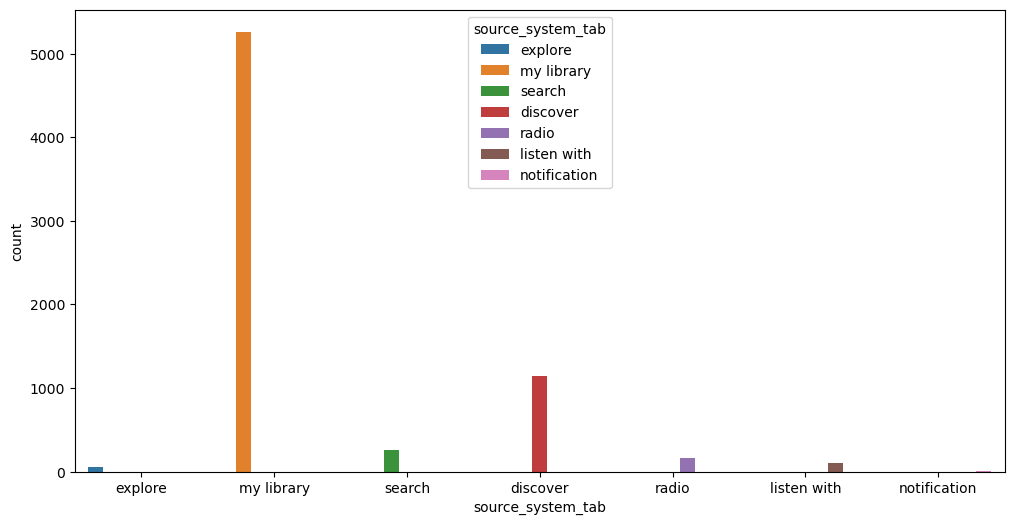

In [27]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],hue=train['source_system_tab'])

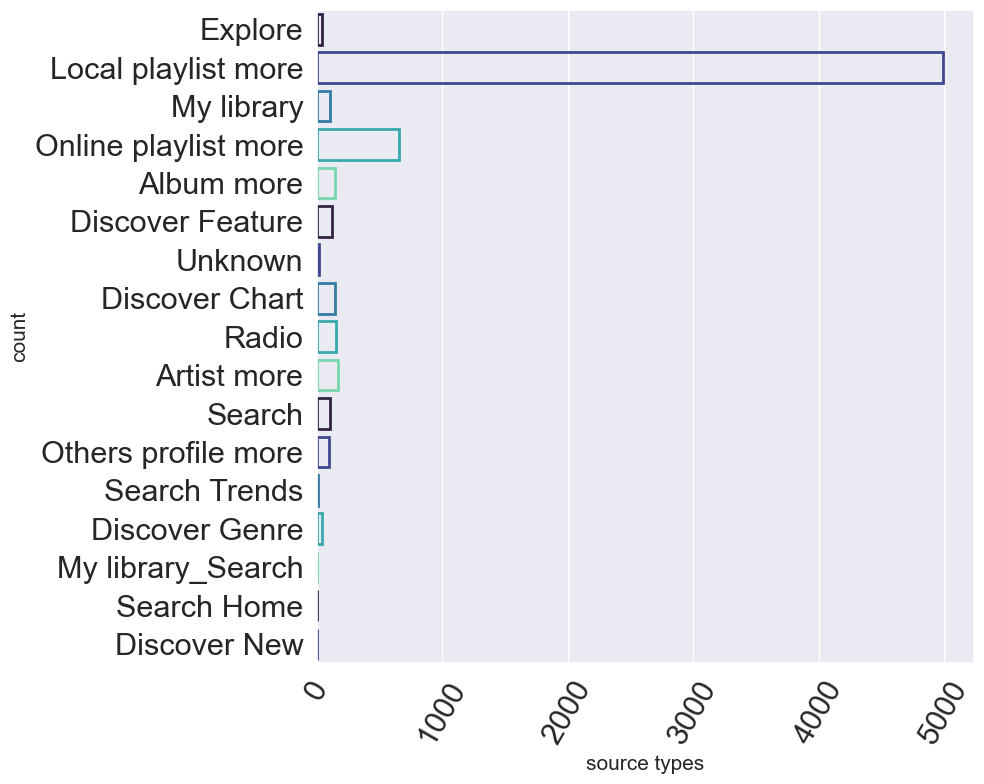

In [41]:
plt.figure(figsize=(10,8))
sns.set(font_scale=2)
sns.countplot(y='source_screen_name',data=train,facecolor=(0,0,0,0),linewidth=2,edgecolor=sns.color_palette('mako',5))
sns.set(style="darkgrid")
plt.xlabel('source types',fontsize=15)
plt.ylabel('count',fontsize=15)
plt.xticks(rotation='60')
plt.tight_layout()

<AxesSubplot:xlabel='source_system_tab', ylabel='count'>

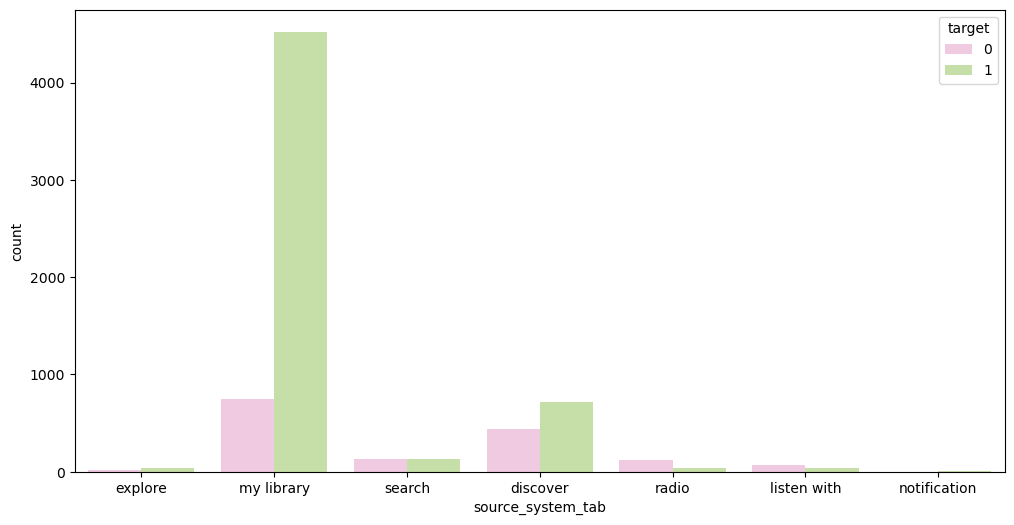

In [32]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_system_tab'],palette='PiYG',hue=train['target'])

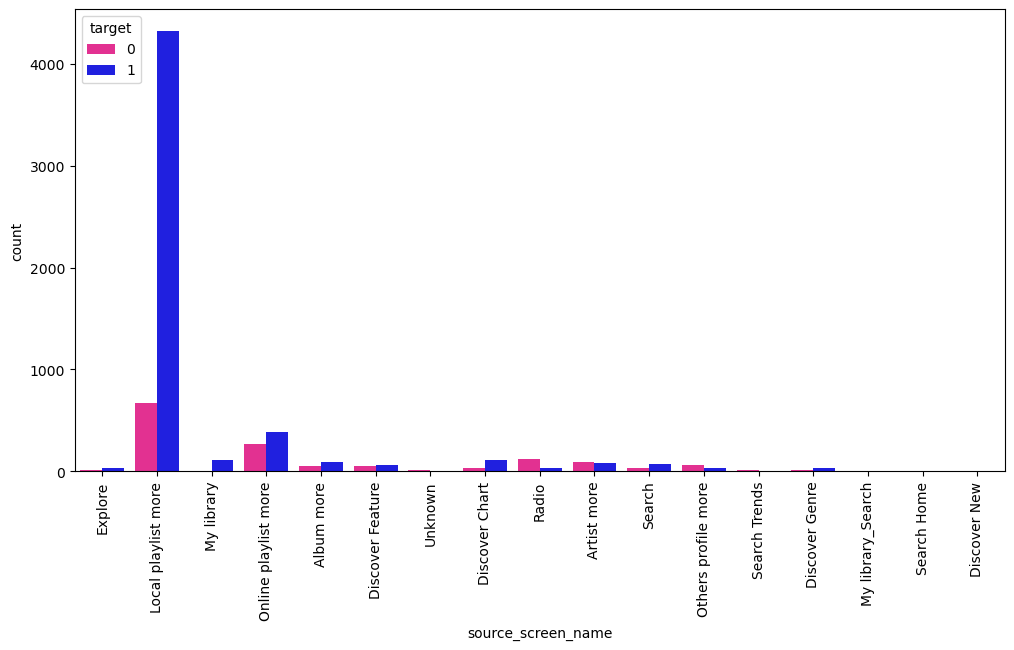

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x = train['source_screen_name'],palette=['deeppink','blue'],hue=train['target'],data = train,orient='v')
plt.xticks(rotation =90)
plt.show()

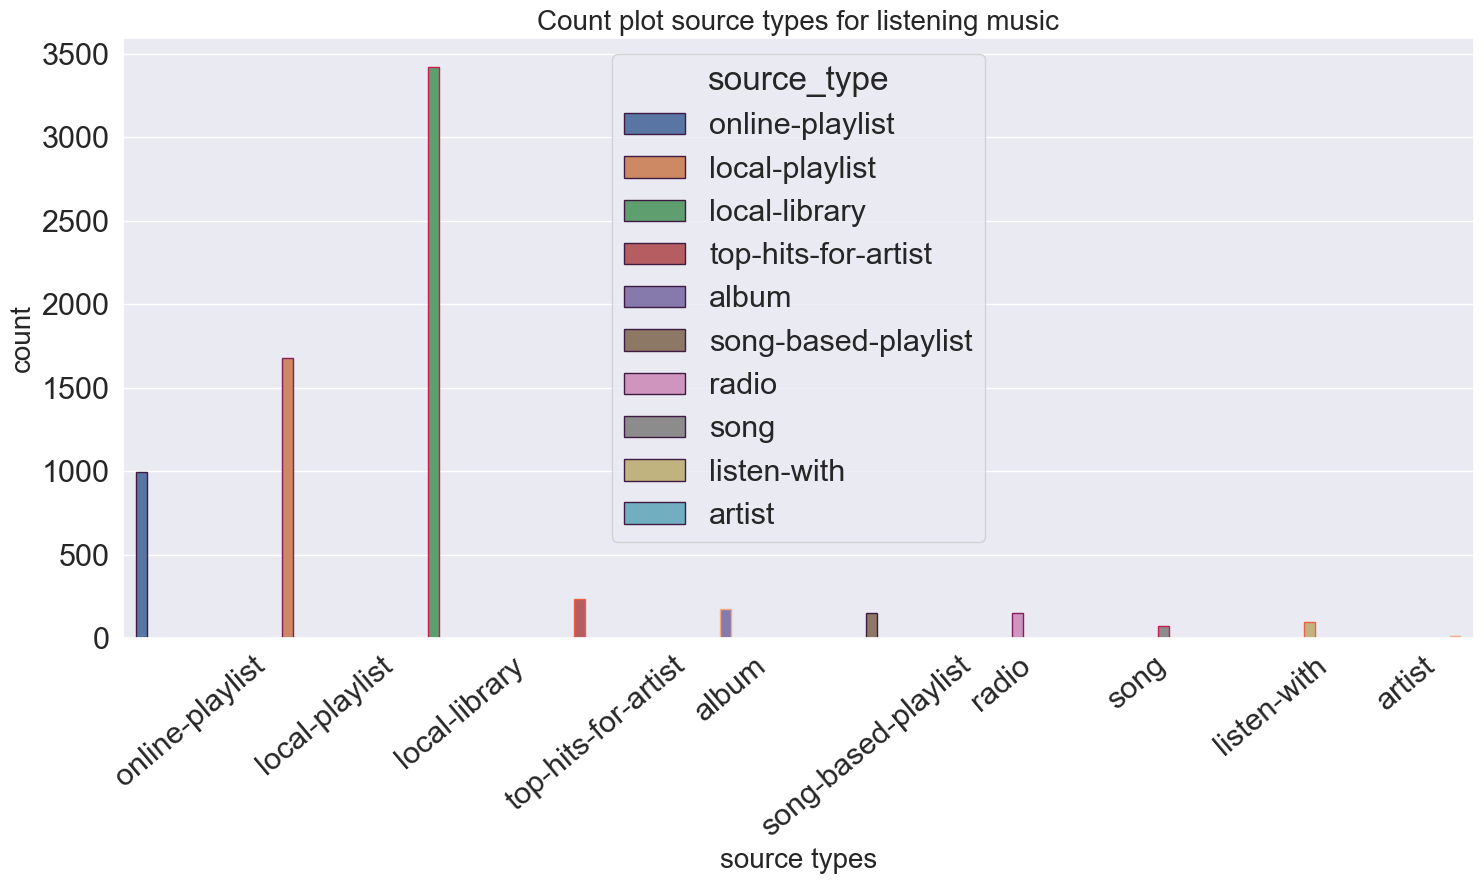

In [37]:
plt.figure(figsize=(15,9))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train,edgecolor=sns.color_palette('rocket',5))
sns.set(style="ticks")
plt.xlabel('source types',fontsize=20)
plt.ylabel('count',fontsize=20)
plt.xticks(rotation='40')
plt.title('Count plot source types for listening music',fontsize=20)
plt.tight_layout()

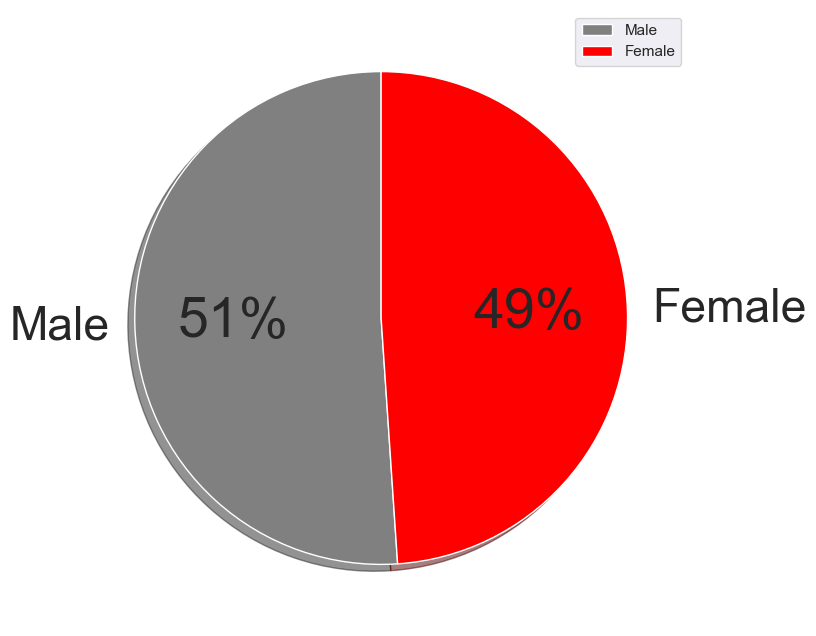

In [44]:
# members dataset
import matplotlib as mpl

mpl.rcParams['font.size'] = 40.0
labels = ['Male','Female']
colors = ['grey','red']
plt.figure(figsize = (8, 8))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels,colors=colors, autopct='%.0f%%',
                                    shadow=True, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

<AxesSubplot:xlabel='language', ylabel='count'>

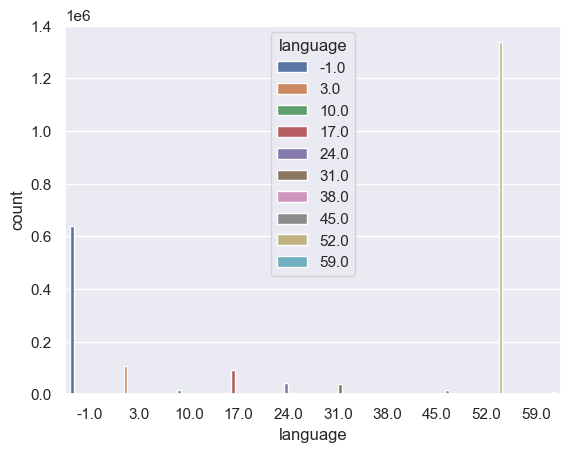

In [45]:
sns.countplot(x = songs['language'],data =train,hue=songs['language'],orient='v')

C:\Users\rutuj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'registration time ')

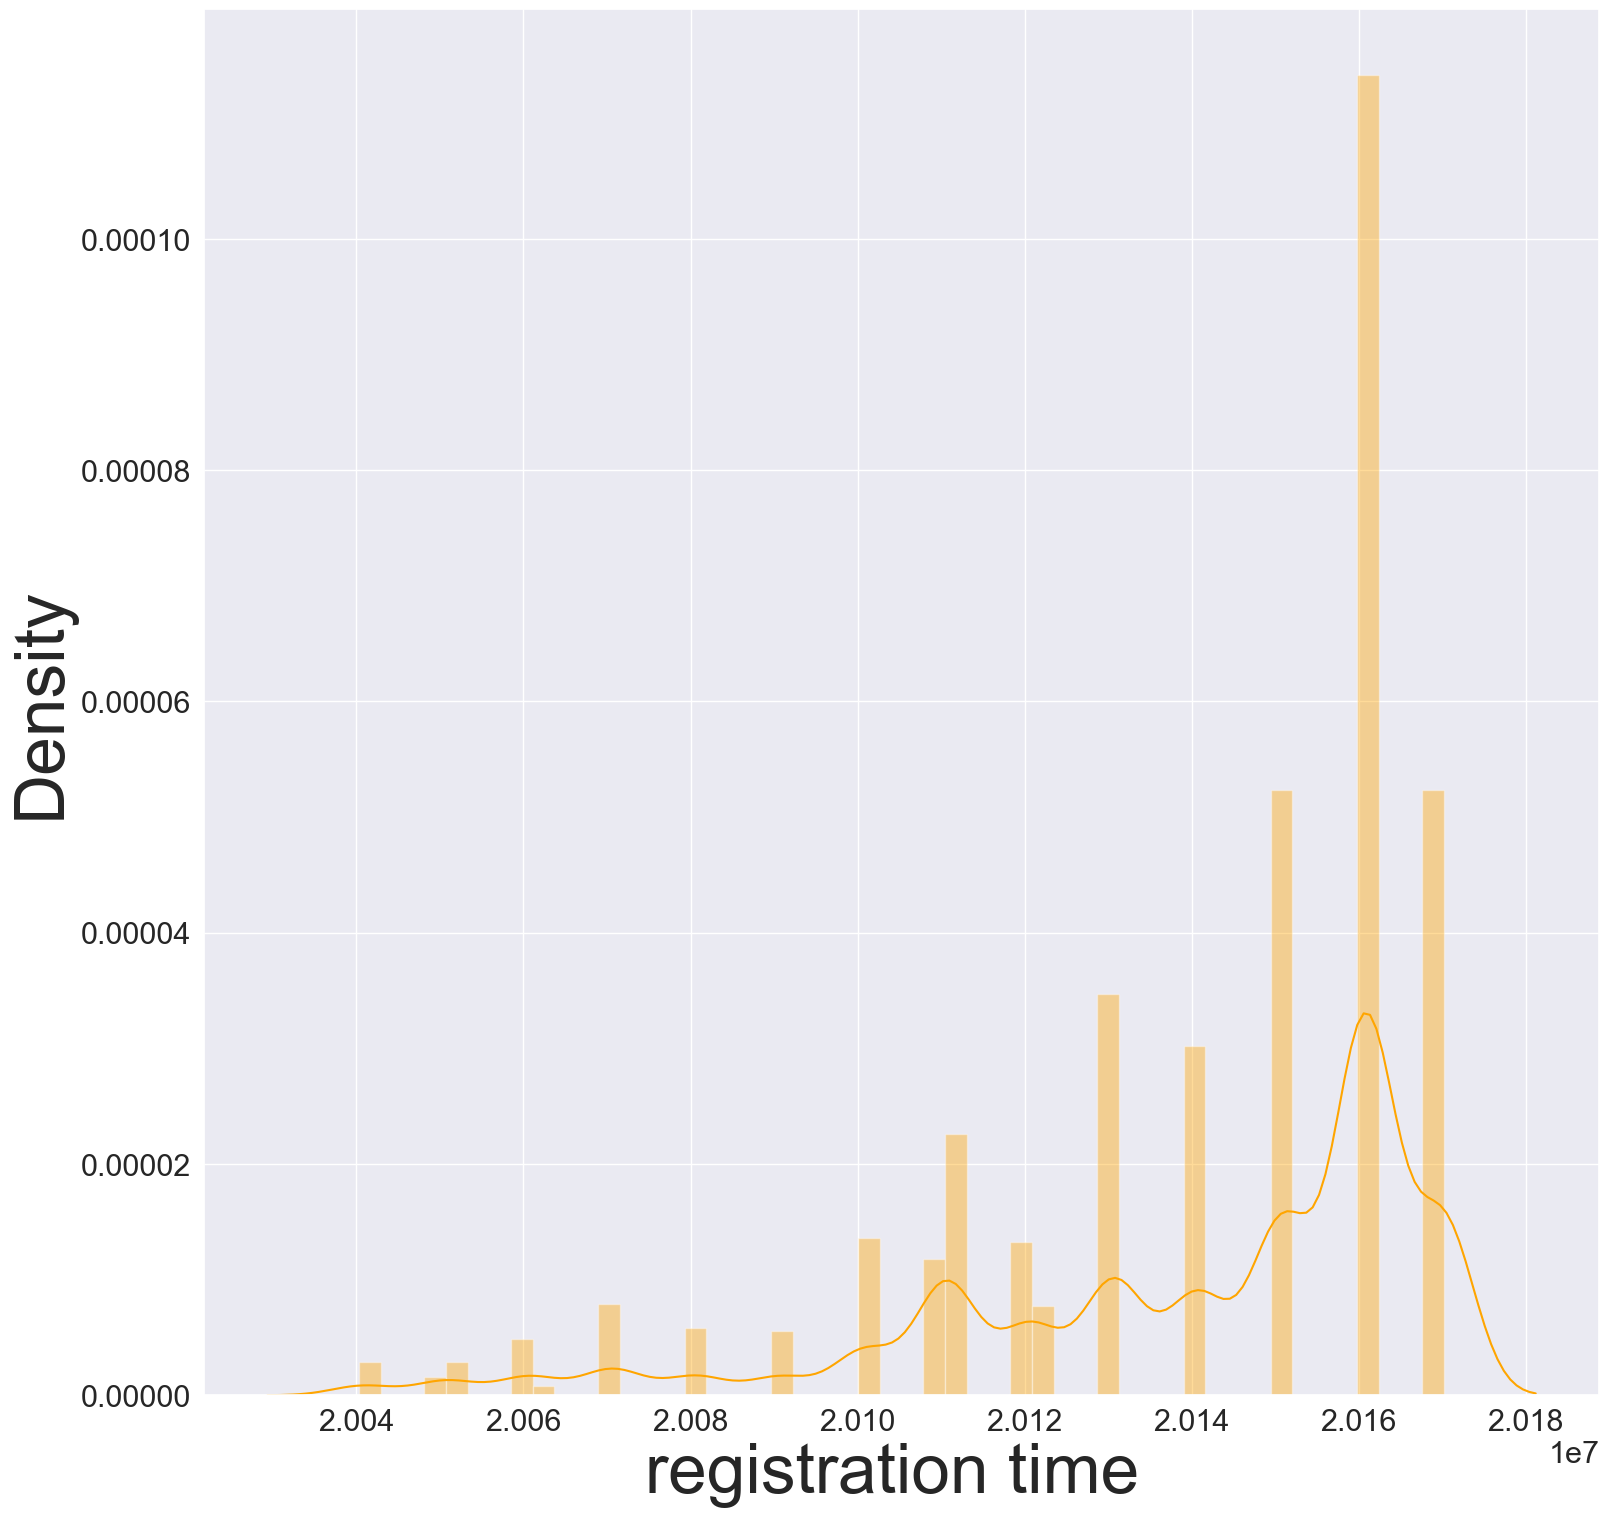

In [47]:
plt.figure(figsize = (18, 18)) 
sns.distplot(members.registration_init_time,color='orange')
sns.set(font_scale=2)
plt.ylabel('Density',fontsize=50)
plt.xlabel('registration time ' ,fontsize=50)

In [48]:
def plot_pdf_cdf(x, flag):
  plt.figure(figsize = (10, 6)) 
  kwargs = {'cumulative': True}
  if flag:
    sns.distplot(x, hist_kws = kwargs, kde_kws = kwargs,color='purple')
    plt.title('CDF for age')
  else:
    sns.distplot(x,color='purple')
    plt.title('PDF for age')
  sns.set(font_scale=2)

C:\Users\rutuj\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


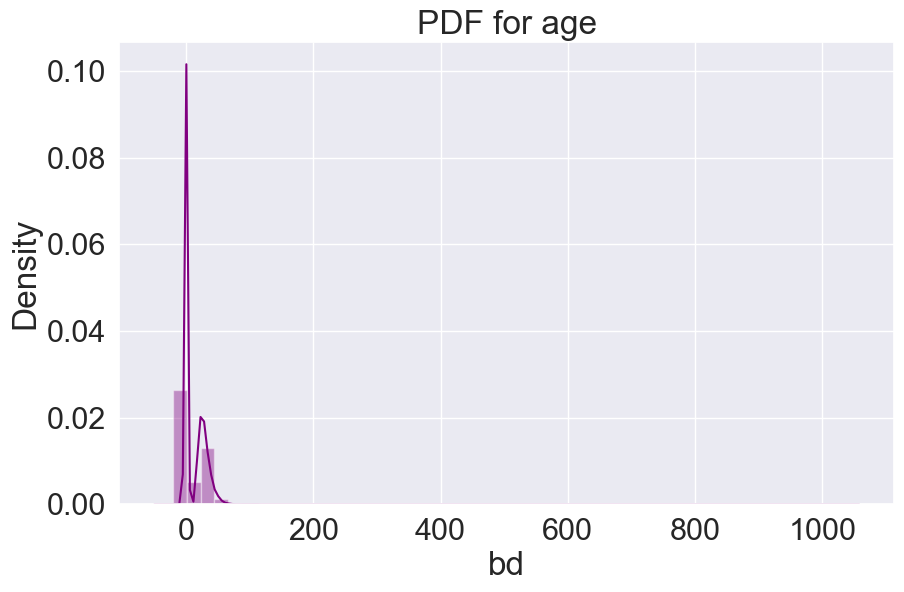

In [49]:
plot_pdf_cdf(members['bd'], False)

In [50]:
np.percentile(members['bd'].values, 98)

47.0

# Preprocessing

In [51]:
test = test1.drop(['target'],axis=1)
ytr = np.array(test1['target'])

In [52]:
test_name = ['id','msno','song_id','source_system_tab',\
             'source_screen_name','source_type']
test['id']=np.arange(nts)
test = test[test_name]

In [53]:
song_cols = ['song_id', 'artist_name', 'genre_ids', 'song_length', 'language']
train = train.merge(songs[song_cols], on='song_id', how='left')
test = test.merge(songs[song_cols], on='song_id', how='left')

In [55]:
members['registration_year'] = members['registration_init_time'].apply(lambda x: int(str(x)[0:4]))
members['registration_month'] = members['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members['registration_date'] = members['registration_init_time'].apply(lambda x: int(str(x)[6:8]))

In [56]:
members['expiration_year'] = members['expiration_date'].apply(lambda x: int(str(x)[0:4]))
members['expiration_month'] = members['expiration_date'].apply(lambda x: int(str(x)[4:6]))
members['expiration_date'] = members['expiration_date'].apply(lambda x: int(str(x)[6:8]))
members = members.drop(['registration_init_time'], axis=1)

In [57]:
members_cols = members.columns
train = train.merge(members[members_cols], on='msno', how='left')
test = test.merge(members[members_cols], on='msno', how='left')

In [58]:
train = train.fillna(-1)
test = test.fillna(-1)

In [59]:

import gc
del members, songs; gc.collect();
colm = list(train.columns)
colm.remove('target')

In [60]:
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder
for col in tqdm(colm):
    if train[col].dtype == 'object':
        train[col] = train[col].apply(str)
        test[col] = test[col].apply(str)

        le = LabelEncoder()
        train_vals = list(train[col].unique())
        test_vals = list(test[col].unique())
        le.fit(train_vals + test_vals)
        train[col] = le.transform(train[col])
        test[col] = le.transform(test[col])

100%|█████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 278.01it/s]


In [61]:
unique_songs = range(max(train['song_id'].max(), test['song_id'].max()))
song_popularity = pd.DataFrame({'song_id': unique_songs, 'popularity':0})

train_sorted = train.sort_values('song_id')
train_sorted.reset_index(drop=True, inplace=True)
test_sorted = test.sort_values('song_id')
test_sorted.reset_index(drop=True, inplace=True)

# Model Creation & Training

In [62]:
from sklearn.model_selection import train_test_split
import lightgbm as lgb
X = np.array(train.drop(['target'], axis=1))
y = train['target'].values

X_test = np.array(test.drop(['id'], axis=1))
ids = test['id'].values

del train, test; gc.collect();

X_train, X_valid, y_train, y_valid = train_test_split(X, y, \
    test_size=0.1, random_state = 12)
    
del X, y; gc.collect();

d_train = lgb.Dataset(X_train, label=y_train)
d_valid = lgb.Dataset(X_valid, label=y_valid) 

watchlist = [d_train, d_valid]

In [63]:
# basic classification model
def predict(m1_model):
    model = m1_model.fit(X_train,y_train)
    print('Training Score : {}'.format(model.score(X_train,y_train)))
    y_pred = model.predict(X_valid)
    #accuracy_score = m1_model.metrics.accuracy_score(y_valid,y_pred)
    #print('Accuracy Score : {}'.format(accuracy_score))
    v_test = model.predict(X_test)
    yhat = (v_test>0.5).astype(int)
    comp = (yhat==ytr).astype(int)
    acc = comp.sum()/comp.size*100
    print("Accuracy on test data for the model", acc)

In [65]:
# logistic regresson and random forest
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [66]:
predict(LogisticRegression())

Training Score : 0.783968253968254
Accuracy on test data for the model 74.9


In [67]:
predict(RandomForestClassifier())

Training Score : 1.0
Accuracy on test data for the model 79.0


In [68]:
# using lightbgm
params = {}
params['learning_rate'] = 0.4
params['application'] = 'binary'
params['max_depth'] = 15
params['num_leaves'] = 2**8
params['verbosity'] = 0
params['metric'] = 'auc'

model1 = lgb.train(params, train_set=d_train, num_boost_round=200, valid_sets=watchlist, \
early_stopping_rounds=10, verbose_eval=10)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 10 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[10]	training's auc: 0.9

C:\Users\rutuj\anaconda3\lib\site-packages\lightgbm\engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\rutuj\anaconda3\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


In [69]:
p_test = model1.predict(X_test)

In [71]:
# accuracy
yhat = (p_test>0.5).astype(int)
comp = (yhat==ytr).astype(int)
acc = comp.sum()/comp.size*100
print('Testing accuracy of lgbm model: {0:f}%'.format(acc))

Testing accuracy of lgbm model: 78.566667%
